In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math

### Definitions for McDonald (1963) Spheroid Capacitance

In [2]:
#We vary the ellipsoid major axis a on the x-axis as this controls prolate or oblateness

f_x_sphere = lambda r: r
f_x_disc   = lambda r: 2*r/math.pi

def f_x_prolate(a, b):
    """a is the major axis, b is the minor axis"""
    A = (a**2 - b**2)**0.5 
    y = A/np.log((a + A)/b)
    return y
    
def f_x_oblate(a, c):
    """a is the major axis, c is the minor axis"""
    e = (1 - (c**2/a**2))**0.5 
    y = a * e / np.arcsin(e)
    return y  

### Definitions of crystal capacitance from Westbrook (2006)

In [148]:
#### Functions are based on aspect ratio and a is the basal face, so will vary with type
#expect a to be the semi minor axis for prolates, and a to be the semi-major axis for oblates

#A=L/2a

def Westbrook_columns_plates(a, c):
    """Plate A < 1, Column A > 1"""
    #change according to aspect
    A = c/a
    return 0.58*(1+(0.95*(A**(0.75))))*a

def Westbrook_4_rosette(D, c):
    #vary between 1-10
    A = 2*c/D
    return 0.35*A**(-0.27)*D

def Westbrook_6_rosette(D, c):
    #vary between 1-10, note dmax = 2a
    A = 2*c/D
    return 0.4*(A)**(-0.25)*D

def Westbrook_stellar(a, c):
    A = c/a
    #star thick 0.2, star thin 0.02
    return 0.596*(1-(0.38*np.exp(-4.7*(A))))*a

def Westbrook_dendrite(a, c):
    A = c/a
    return 0.596*(1-0.3*np.exp(-5.8*A))*a

### Capacitance of Spheroids 
> Fix the minor axis and vary the major axis. The Ellipse major axis is responsible for how oblate or prolate the crystal is 

In [128]:


#========================================================================================================
#=============> Choose the number of points in the linspace. This only affects resolution.
npoints = 50
#=============>Choose the limits to the major axis variation i.e. -5 = 1x10^-5 m 
M_axlow, M_axup = -5, -4
#=============> choose the range over which oblates and prolate aspect ratios will be plotted i.e. -2 = 0.01, 2= 100
AR_low, AR_up = -2,2
#=============>fix semi-minor axis (m)
minor_axval = 1e-5
#========================================================================================================
if minor_axval > 1*10**(M_axlow):
    print('The minor axis must not be larger than the major axis')

#Define the linspaces for the above values
major_ax     = np.logspace(M_axlow, M_axup, npoints)
minor_ax     = np.linspace(minor_axval, minor_axval, npoints) 
AR_oblates   = np.logspace(AR_low, 0, npoints)
AR_prolates  = np.logspace(0, AR_up, npoints)
AR_spherical = np.logspace(0, 0, npoints*2)

#create major radius from changing aspect ratio and fixed minor axis
#FORMULAS: AR_prolates = major axis / minor axis , AR_oblates = minor axis / major axis

major_x_oblates   = minor_ax / AR_oblates
major_x_prolates  = minor_ax * AR_prolates 
major_x_spherical = np.concatenate((minor_ax, minor_ax))


<ipython-input-2-4e8520313312>:15: RuntimeWarning: invalid value encountered in true_divide
  y = a * e / np.arcsin(e)
<ipython-input-2-4e8520313312>:9: RuntimeWarning: invalid value encountered in true_divide
  y = A/np.log((a + A)/b)
<ipython-input-2-4e8520313312>:15: RuntimeWarning: invalid value encountered in true_divide
  y = a * e / np.arcsin(e)
<ipython-input-2-4e8520313312>:9: RuntimeWarning: invalid value encountered in true_divide
  y = A/np.log((a + A)/b)


Text(0.5, 0, 'Aspect Ratio')

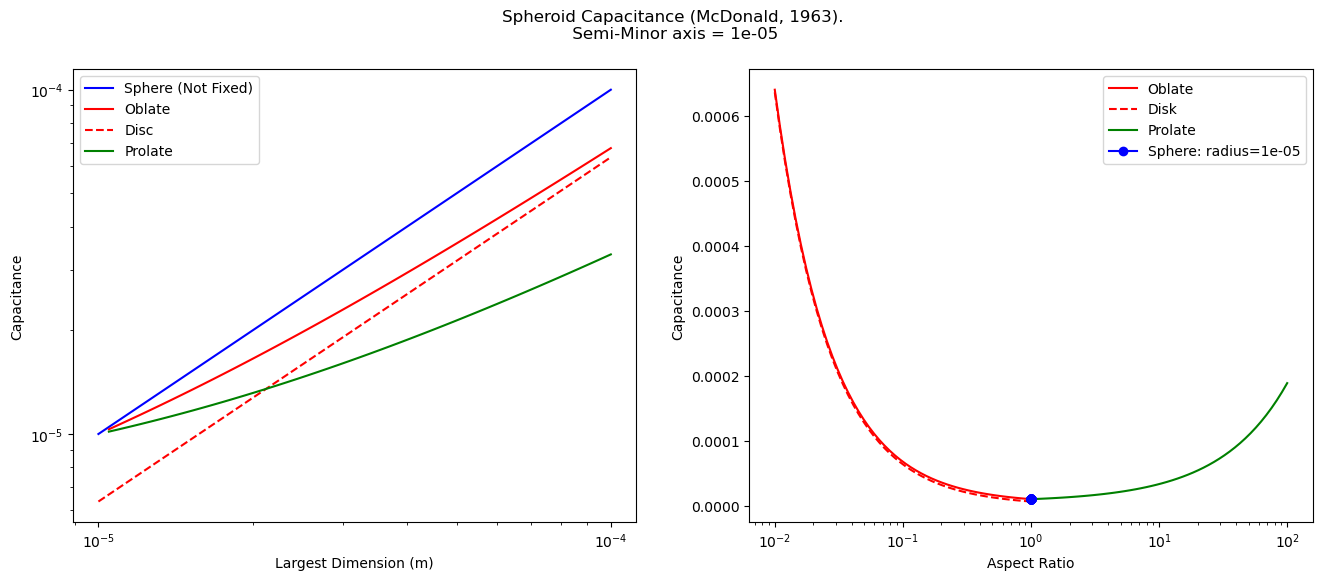

In [129]:
fig, ax = plt.subplots(ncols=2, figsize=(16, 6), dpi=100)
#axis 1 plots capacitance over a range of semi-major ax values for a fixed semi minor ax value
#axis 2 plots capacitance over a range of aspect ratios for a fixed semi minor ax value

#########Plot column 1 
ax[0].plot(major_ax, f_x_sphere(major_ax),            label='Sphere (Not Fixed)', c='b')
ax[0].plot(major_ax, f_x_oblate(major_ax, minor_ax),  label='Oblate', c='r')
ax[0].plot(major_ax, f_x_disc(major_ax),              label='Disc', c='r', ls='--')
ax[0].plot(major_ax, f_x_prolate(major_ax, minor_ax), label='Prolate', c='g')
#########Plot column 2 
ax[1].plot(AR_oblates,   f_x_oblate(major_x_oblates, minor_ax),   label='Oblate', c='r')
ax[1].plot(AR_oblates,   f_x_disc(major_x_oblates),                label='Disk', c='r', ls='--')
ax[1].plot(AR_prolates,  f_x_prolate(major_x_prolates, minor_ax), label='Prolate', c='g')
ax[1].plot(AR_spherical, f_x_sphere(major_x_spherical),  marker = 'o', label='Sphere: radius='+str(minor_ax[0]), c='b')

#### axis properties
for axis in fig.get_axes():
    axis.set_xscale('log')
    axis.set_ylabel('Capacitance')
    axis.legend()

ax[0].set_yscale('log')

fig.suptitle("Spheroid Capacitance (McDonald, 1963).\n Semi-Minor axis = "+str(minor_ax[0]))
ax[0].set_xlabel('Largest Dimension (m)')
ax[1].set_xlabel('Aspect Ratio')


<ipython-input-2-4e8520313312>:15: RuntimeWarning: invalid value encountered in true_divide
  y = a * e / np.arcsin(e)
<ipython-input-2-4e8520313312>:9: RuntimeWarning: invalid value encountered in true_divide
  y = A/np.log((a + A)/b)


Text(0.5, 0, 'Aspect Ratio')

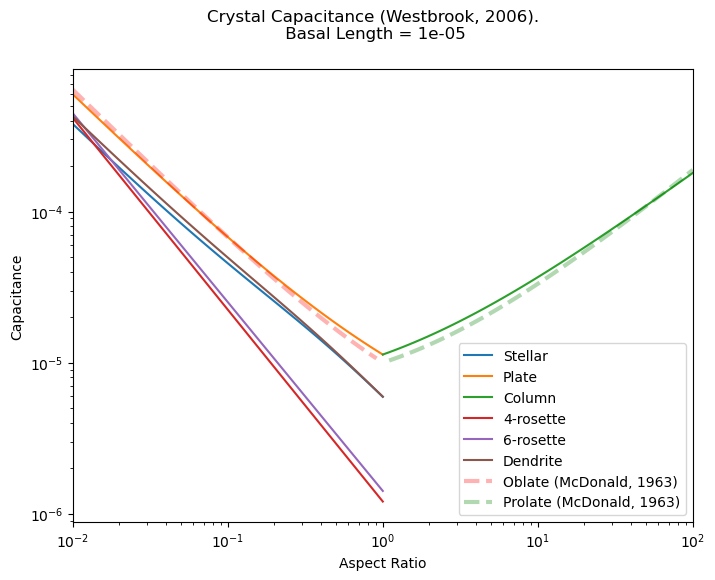

In [151]:
#Plot the aspect ratio for a fixed basal face length (normalised ) 
fig, ax = plt.subplots(figsize=(8,6), dpi=100)

#fix the small axis here:
minor_ax             = np.linspace(minor_axval,minor_axval, npoints) 

#its preferable to fix the semi minor axis as in the spheroid approximation
#this will allow us to compare capacitance for increased oblateness
#to do this we must recalculate the basal length based on the AR to fix the non basal length 
oblate_long_length  = minor_ax / AR_oblates
prolate_long_length = minor_ax * AR_prolates

#Plot Westbrook curves 
#Westbrook(Dmax, AR)
ax.plot(AR_oblates,  Westbrook_stellar(oblate_long_length, minor_ax), label='Stellar')
ax.plot(AR_oblates,  Westbrook_columns_plates(oblate_long_length, minor_ax), label='Plate')
ax.plot(AR_prolates, Westbrook_columns_plates(minor_ax, prolate_long_length), label='Column')
ax.plot(AR_oblates,  Westbrook_4_rosette(oblate_long_length/2, minor_ax), label='4-rosette')
ax.plot(AR_oblates,  Westbrook_6_rosette(oblate_long_length/2, minor_ax), label='6-rosette')
ax.plot(AR_oblates,  Westbrook_dendrite(oblate_long_length, minor_ax), label='Dendrite')

ax.plot(AR_oblates,   f_x_oblate(oblate_long_length, minor_ax),   label='Oblate (McDonald, 1963)', c='r', alpha=0.3, lw=3, ls='--')
ax.plot(AR_prolates,  f_x_prolate(prolate_long_length, minor_ax), label='Prolate (McDonald, 1963)', c='g', alpha=0.3, lw=3, ls='--')

#### axis properties
for axis in fig.get_axes():
    axis.set_xscale('log')
    axis.set_yscale('log')
    axis.set_ylabel('Capacitance')
    axis.legend()
    axis.set_xlim(0.01, 100)

fig.suptitle("Crystal Capacitance (Westbrook, 2006).\n Basal Length = "+str(minor_axval))
ax.set_xlabel('Aspect Ratio')

<ipython-input-2-4e8520313312>:15: RuntimeWarning: invalid value encountered in true_divide
  y = a * e / np.arcsin(e)
<ipython-input-2-4e8520313312>:15: RuntimeWarning: invalid value encountered in true_divide
  y = a * e / np.arcsin(e)
<ipython-input-2-4e8520313312>:9: RuntimeWarning: invalid value encountered in true_divide
  y = A/np.log((a + A)/b)
<ipython-input-2-4e8520313312>:15: RuntimeWarning: invalid value encountered in true_divide
  y = a * e / np.arcsin(e)
<ipython-input-2-4e8520313312>:15: RuntimeWarning: invalid value encountered in true_divide
  y = a * e / np.arcsin(e)
<ipython-input-2-4e8520313312>:15: RuntimeWarning: invalid value encountered in true_divide
  y = a * e / np.arcsin(e)


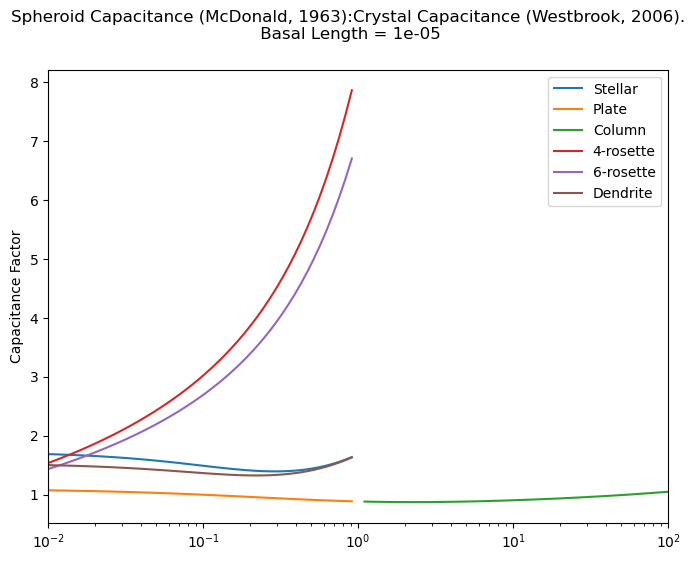

In [153]:
#show relative difference oblate/habit 

fig, ax = plt.subplots(figsize=(8,6), dpi=100)

ax.plot(AR_oblates,  f_x_oblate(oblate_long_length, minor_ax)/Westbrook_stellar(oblate_long_length, minor_ax), label='Stellar')
ax.plot(AR_oblates,  f_x_oblate(oblate_long_length, minor_ax)/Westbrook_columns_plates(oblate_long_length, minor_ax), label='Plate')
ax.plot(AR_prolates, f_x_prolate(prolate_long_length, minor_ax)/Westbrook_columns_plates(minor_ax, prolate_long_length), label='Column')
ax.plot(AR_oblates,  f_x_oblate(oblate_long_length, minor_ax)/Westbrook_4_rosette(oblate_long_length/2, minor_ax), label='4-rosette')
ax.plot(AR_oblates,  f_x_oblate(oblate_long_length, minor_ax)/Westbrook_6_rosette(oblate_long_length/2, minor_ax), label='6-rosette')
ax.plot(AR_oblates,  f_x_oblate(oblate_long_length, minor_ax)/Westbrook_dendrite(oblate_long_length, minor_ax), label='Dendrite')
#### axis properties
for axis in fig.get_axes():
    axis.set_xscale('log')
#     axis.set_yscale('log')
    axis.set_ylabel('Capacitance Factor')
    fig.suptitle("Spheroid Capacitance (McDonald, 1963):Crystal Capacitance (Westbrook, 2006).\n Basal Length = "+str(minor_axval))
    axis.legend()
    axis.set_xlim(0.01, 100)

## Surface area and Volume comparison

In [92]:
#Surface areas
def hexagonal_prism_SA(s,c):
    """s is side length (circumcircular radius for regular hexagon). h is length (h=2c) """
    return 6*s*2*c + 3*np.sqrt(3)*s**2

def prolate_SA(a,c):
    """c  >> a"""
    eccentricity = np.sqrt(1 - (a**2 / c**2))
    SA = (2*math.pi*a**2) * (1+((c/(a*eccentricity)) *np.arcsin(eccentricity)))
    return SA

def oblate_SA(a, c):
    """c  << a"""
    E = np.sqrt(1 - (c**2 / a**2))
    SA = (2*math.pi*a**2) + (math.pi*(c**2/E**2))*np.log(  (1+E)  / (1-E))
    return SA

#Volumes
def spheroid_volume(a,c):
    """a is the symmetric radius and c the unique """
    return (4/3) * (math.pi*(a**2)*c)

def hexagonal_prism_volume(s,c):
    """h is the full crystal length, s the circumcircular radius (h/2 = c)"""
    return (3*np.sqrt(3)/2) * math.pi*s**2 * 2*c

<ipython-input-92-b6361e5298f2>:15: RuntimeWarning: divide by zero encountered in true_divide
  SA = (2*math.pi*a**2) + (math.pi*(c**2/E**2))*np.log(  (1+E)  / (1-E))
<ipython-input-92-b6361e5298f2>:15: RuntimeWarning: invalid value encountered in multiply
  SA = (2*math.pi*a**2) + (math.pi*(c**2/E**2))*np.log(  (1+E)  / (1-E))
<ipython-input-92-b6361e5298f2>:9: RuntimeWarning: divide by zero encountered in true_divide
  SA = (2*math.pi*a**2) * (1+((c/(a*eccentricity)) *np.arcsin(eccentricity)))
<ipython-input-92-b6361e5298f2>:9: RuntimeWarning: invalid value encountered in multiply
  SA = (2*math.pi*a**2) * (1+((c/(a*eccentricity)) *np.arcsin(eccentricity)))


[3.89711432 3.89711432 3.89711432 3.89711432 3.89711432 3.89711432
 3.89711432 3.89711432 3.89711432 3.89711432 3.89711432 3.89711432
 3.89711432 3.89711432 3.89711432 3.89711432 3.89711432 3.89711432
 3.89711432 3.89711432 3.89711432 3.89711432 3.89711432 3.89711432
 3.89711432 3.89711432 3.89711432 3.89711432 3.89711432 3.89711432
 3.89711432 3.89711432 3.89711432 3.89711432 3.89711432 3.89711432
 3.89711432 3.89711432 3.89711432 3.89711432 3.89711432 3.89711432
 3.89711432 3.89711432 3.89711432 3.89711432 3.89711432 3.89711432
 3.89711432 3.89711432]


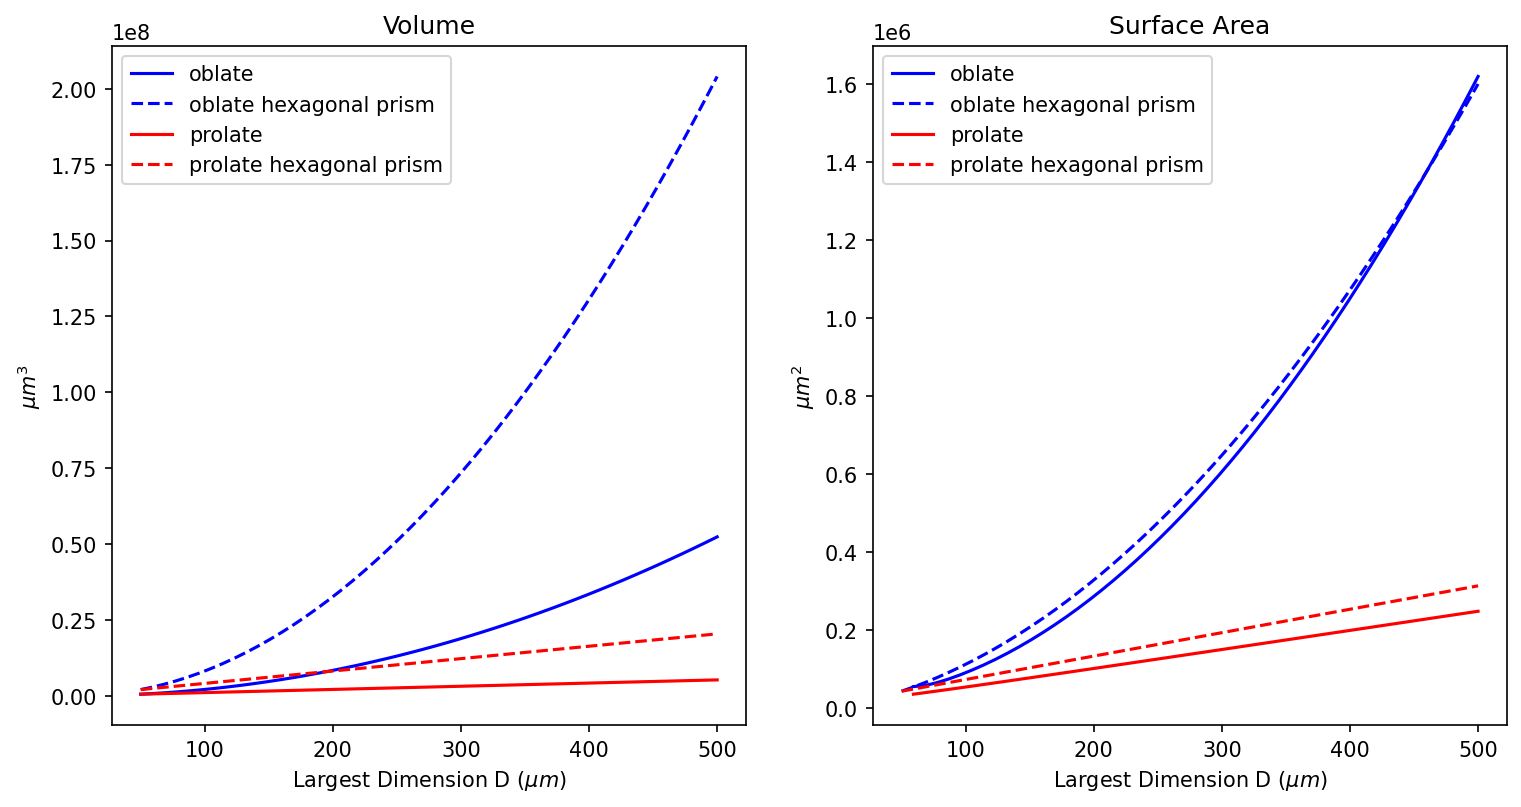

In [95]:
#plot the surface area and volumes of spheroids and hexagonal prisms

fig, ax = plt.subplots(ncols=2, figsize=(12,6), dpi=150)

cnst_radius = 5e-5*1e6
oblate_c     = np.linspace(cnst_radius, cnst_radius, npoints)
prolate_a    = np.linspace(cnst_radius, cnst_radius, npoints)

oblate_a = np.linspace(cnst_radius, 10*cnst_radius, npoints)
prolate_c = np.linspace(cnst_radius, 10*cnst_radius, npoints)

#Volume
ax[0].plot(oblate_a, spheroid_volume(oblate_a, oblate_c), label='oblate', c='b')
ax[0].plot(oblate_a, hexagonal_prism_volume(oblate_a, oblate_c), label='oblate hexagonal prism',c='b', ls='--')
ax[0].plot(prolate_c, spheroid_volume(prolate_a, prolate_c), label='prolate',c='r')
ax[0].plot(prolate_c, hexagonal_prism_volume(prolate_a, prolate_c), label='prolate hexagonal prism',c='r', ls='--')

#Surface Area
ax[1].plot(oblate_a, oblate_SA(oblate_a, oblate_c), label='oblate',c='b')
ax[1].plot(oblate_a, hexagonal_prism_SA(oblate_a, oblate_c), label='oblate hexagonal prism',c='b', ls='--')
ax[1].plot(prolate_c, prolate_SA(prolate_a, prolate_c), label='prolate',c='r')
ax[1].plot(prolate_c, hexagonal_prism_SA(prolate_a, prolate_c), label='prolate hexagonal prism',c='r', ls='--')

ax[0].legend(), ax[1].legend()
ax[0].set_xlabel("Largest Dimension D ($\mu m$)"), ax[1].set_xlabel("Largest Dimension D ($\mu m$)")
ax[0].set_title("Volume"), ax[1].set_title("Surface Area")
ax[0].set_ylabel("$\mu m^3$"), ax[1].set_ylabel("$\mu m^2$")

print(hexagonal_prism_volume(oblate_a, oblate_c)/spheroid_volume(oblate_a, oblate_c))

<ipython-input-92-b6361e5298f2>:15: RuntimeWarning: divide by zero encountered in true_divide
  SA = (2*math.pi*a**2) + (math.pi*(c**2/E**2))*np.log(  (1+E)  / (1-E))
<ipython-input-92-b6361e5298f2>:15: RuntimeWarning: invalid value encountered in multiply
  SA = (2*math.pi*a**2) + (math.pi*(c**2/E**2))*np.log(  (1+E)  / (1-E))
<ipython-input-92-b6361e5298f2>:9: RuntimeWarning: divide by zero encountered in true_divide
  SA = (2*math.pi*a**2) * (1+((c/(a*eccentricity)) *np.arcsin(eccentricity)))
<ipython-input-92-b6361e5298f2>:9: RuntimeWarning: invalid value encountered in multiply
  SA = (2*math.pi*a**2) * (1+((c/(a*eccentricity)) *np.arcsin(eccentricity)))


(Text(0, 0.5, '$\\mu m^3$'), Text(0, 0.5, '$\\mu m^2$'))

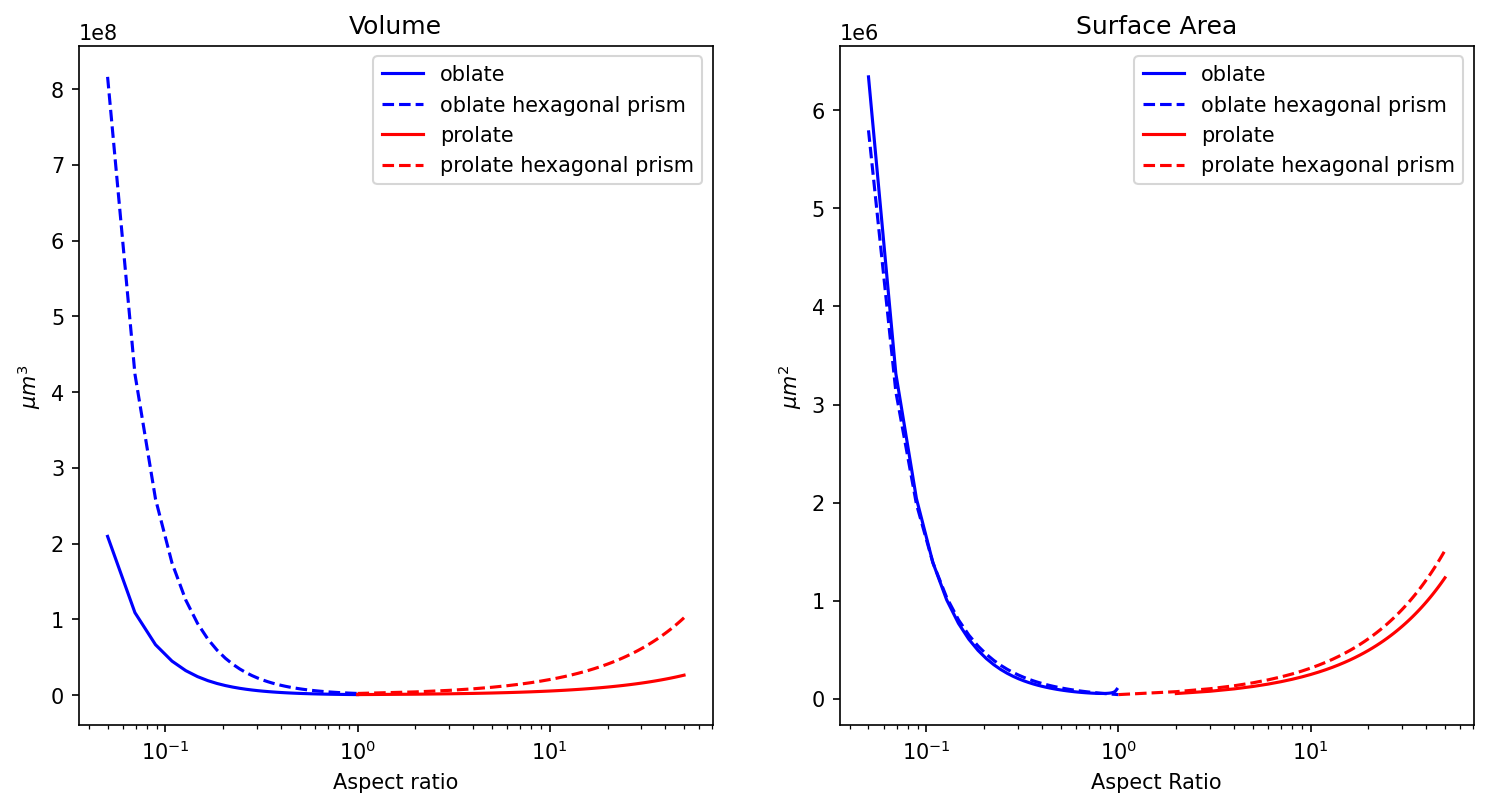

In [96]:
#As above for aspect ratio c=phi*a or a = c/phi
#we will fix the small axis (c in oblates, a in prolates
#let the aspect ratio control other axis

fig, ax = plt.subplots(ncols=2, figsize=(12,6), dpi=150)

cnst_radius = 5e-5*1e6
oblate_c  = np.linspace(cnst_radius, cnst_radius, npoints)
prolate_a = np.linspace(cnst_radius, cnst_radius, npoints)

#convert the oblate a to a phi, leave oblate c as it is 
#convert the prolate c to a phi, leave prolate a as it is 
phi_prolate = np.linspace(1, 50, npoints)
phi_oblate  = np.linspace(0.05, 1, npoints)

#Volume
ax[0].plot(phi_oblate, spheroid_volume(oblate_c/phi_oblate, oblate_c), label='oblate', c='b')
ax[0].plot(phi_oblate, hexagonal_prism_volume(oblate_c/phi_oblate, oblate_c), label='oblate hexagonal prism',c='b', ls='--')

ax[0].plot(phi_prolate, spheroid_volume(prolate_a, prolate_a*phi_prolate), label='prolate',c='r')
ax[0].plot(phi_prolate, hexagonal_prism_volume(prolate_a, prolate_a*phi_prolate), label='prolate hexagonal prism',c='r', ls='--')

#Surface Area
ax[1].plot(phi_oblate, oblate_SA(oblate_c/phi_oblate, oblate_c), label='oblate',c='b')
ax[1].plot(phi_oblate, hexagonal_prism_SA(oblate_c/phi_oblate, oblate_c), label='oblate hexagonal prism',c='b', ls='--')
ax[1].plot(phi_prolate, prolate_SA(prolate_a, prolate_a*phi_prolate), label='prolate',c='r')
ax[1].plot(phi_prolate, hexagonal_prism_SA(prolate_a, prolate_a*phi_prolate), label='prolate hexagonal prism',c='r', ls='--')

ax[0].set_xscale('log'), ax[1].set_xscale('log')
ax[0].legend(), ax[1].legend()
ax[0].set_xlabel("Aspect ratio"), ax[1].set_xlabel("Aspect Ratio")
ax[0].set_title("Volume"), ax[1].set_title("Surface Area")
ax[0].set_ylabel("$\mu m^3$"), ax[1].set_ylabel("$\mu m^2$")

<ipython-input-92-b6361e5298f2>:15: RuntimeWarning: divide by zero encountered in true_divide
  SA = (2*math.pi*a**2) + (math.pi*(c**2/E**2))*np.log(  (1+E)  / (1-E))
<ipython-input-92-b6361e5298f2>:15: RuntimeWarning: invalid value encountered in multiply
  SA = (2*math.pi*a**2) + (math.pi*(c**2/E**2))*np.log(  (1+E)  / (1-E))
<ipython-input-92-b6361e5298f2>:9: RuntimeWarning: divide by zero encountered in true_divide
  SA = (2*math.pi*a**2) * (1+((c/(a*eccentricity)) *np.arcsin(eccentricity)))
<ipython-input-92-b6361e5298f2>:9: RuntimeWarning: invalid value encountered in multiply
  SA = (2*math.pi*a**2) * (1+((c/(a*eccentricity)) *np.arcsin(eccentricity)))
<ipython-input-92-b6361e5298f2>:15: RuntimeWarning: divide by zero encountered in true_divide
  SA = (2*math.pi*a**2) + (math.pi*(c**2/E**2))*np.log(  (1+E)  / (1-E))
<ipython-input-92-b6361e5298f2>:15: RuntimeWarning: invalid value encountered in multiply
  SA = (2*math.pi*a**2) + (math.pi*(c**2/E**2))*np.log(  (1+E)  / (1-E))


[(0.05, 1.0940473958208026), (0.06938775510204082, 1.0591354085452886), (0.08877551020408164, 1.0282829826846553), (0.10816326530612246, 1.0008989879591619), (0.12755102040816327, 0.976512504135141), (0.14693877551020407, 0.9547408630177419), (0.1663265306122449, 0.9352688589611048), (0.18571428571428572, 0.9178342586125705), (0.20510204081632655, 0.9022172485056057), (0.22448979591836737, 0.8882325167785491), (0.24387755102040815, 0.875723182444941), (0.26326530612244897, 0.8645560667140213), (0.2826530612244898, 0.8546179661378787), (0.3020408163265306, 0.8458126905959503), (0.3214285714285714, 0.8380586967548221), (0.3408163265306122, 0.8312871937038647), (0.36020408163265305, 0.8254406299114265), (0.3795918367346939, 0.8204714942166729), (0.3989795918367347, 0.8163413812400531), (0.4183673469387755, 0.8130202853089992), (0.4377551020408163, 0.8104860980973888), (0.45714285714285713, 0.8087242946508673), (0.47653061224489796, 0.8077278010962146), (0.4959183673469388, 0.8074970458007

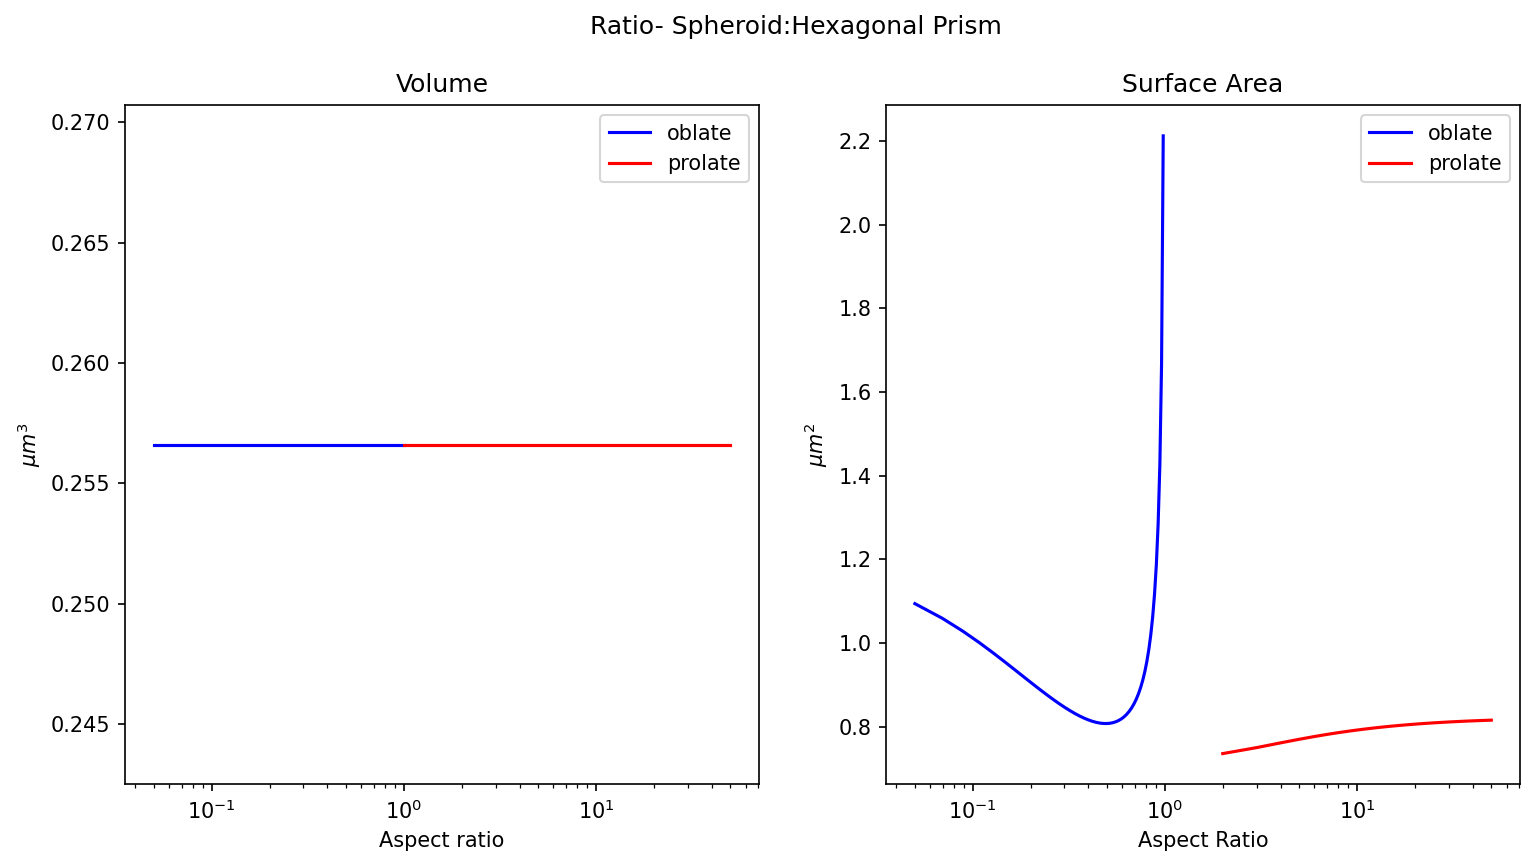

In [115]:
fig, ax = plt.subplots(ncols=2, figsize=(12,6), dpi=150)

ax[0].plot(phi_oblate, spheroid_volume(oblate_c/phi_oblate, oblate_c)/hexagonal_prism_volume(oblate_c/phi_oblate, oblate_c), label='oblate', c='b')
ax[0].plot(phi_prolate, spheroid_volume(prolate_a, prolate_a*phi_prolate)/hexagonal_prism_volume(prolate_a, prolate_a*phi_prolate), label='prolate',c='r')

#Surface Area
ax[1].plot(phi_oblate, oblate_SA(oblate_c/phi_oblate, oblate_c)/hexagonal_prism_SA(oblate_c/phi_oblate, oblate_c), label='oblate',c='b')
ax[1].plot(phi_prolate, prolate_SA(prolate_a, prolate_a*phi_prolate)/hexagonal_prism_SA(prolate_a, prolate_a*phi_prolate), label='prolate',c='r')

ax[0].set_xscale('log'), ax[1].set_xscale('log')
ax[0].legend(), ax[1].legend()
ax[0].set_xlabel("Aspect ratio"), ax[1].set_xlabel("Aspect Ratio")
fig.suptitle("Ratio- Spheroid:Hexagonal Prism ")
ax[0].set_title("Volume"), ax[1].set_title("Surface Area")
ax[0].set_ylabel("$\mu m^3$"), ax[1].set_ylabel("$\mu m^2$")
print([i for i in zip(phi_oblate,oblate_SA(oblate_c/phi_oblate, oblate_c)/hexagonal_prism_SA(oblate_c/phi_oblate, oblate_c))])
# print(prolate_SA(prolate_a, prolate_a*phi_prolate)/hexagonal_prism_SA(prolate_a, prolate_a*phi_prolate))


<ipython-input-92-b6361e5298f2>:15: RuntimeWarning: divide by zero encountered in true_divide
  SA = (2*math.pi*a**2) + (math.pi*(c**2/E**2))*np.log(  (1+E)  / (1-E))
<ipython-input-92-b6361e5298f2>:15: RuntimeWarning: invalid value encountered in multiply
  SA = (2*math.pi*a**2) + (math.pi*(c**2/E**2))*np.log(  (1+E)  / (1-E))
<ipython-input-92-b6361e5298f2>:9: RuntimeWarning: divide by zero encountered in true_divide
  SA = (2*math.pi*a**2) * (1+((c/(a*eccentricity)) *np.arcsin(eccentricity)))
<ipython-input-92-b6361e5298f2>:9: RuntimeWarning: invalid value encountered in multiply
  SA = (2*math.pi*a**2) * (1+((c/(a*eccentricity)) *np.arcsin(eccentricity)))


(Text(0, 0.5, '$\\mu m^3$'), Text(0, 0.5, '$\\mu m^2$'))

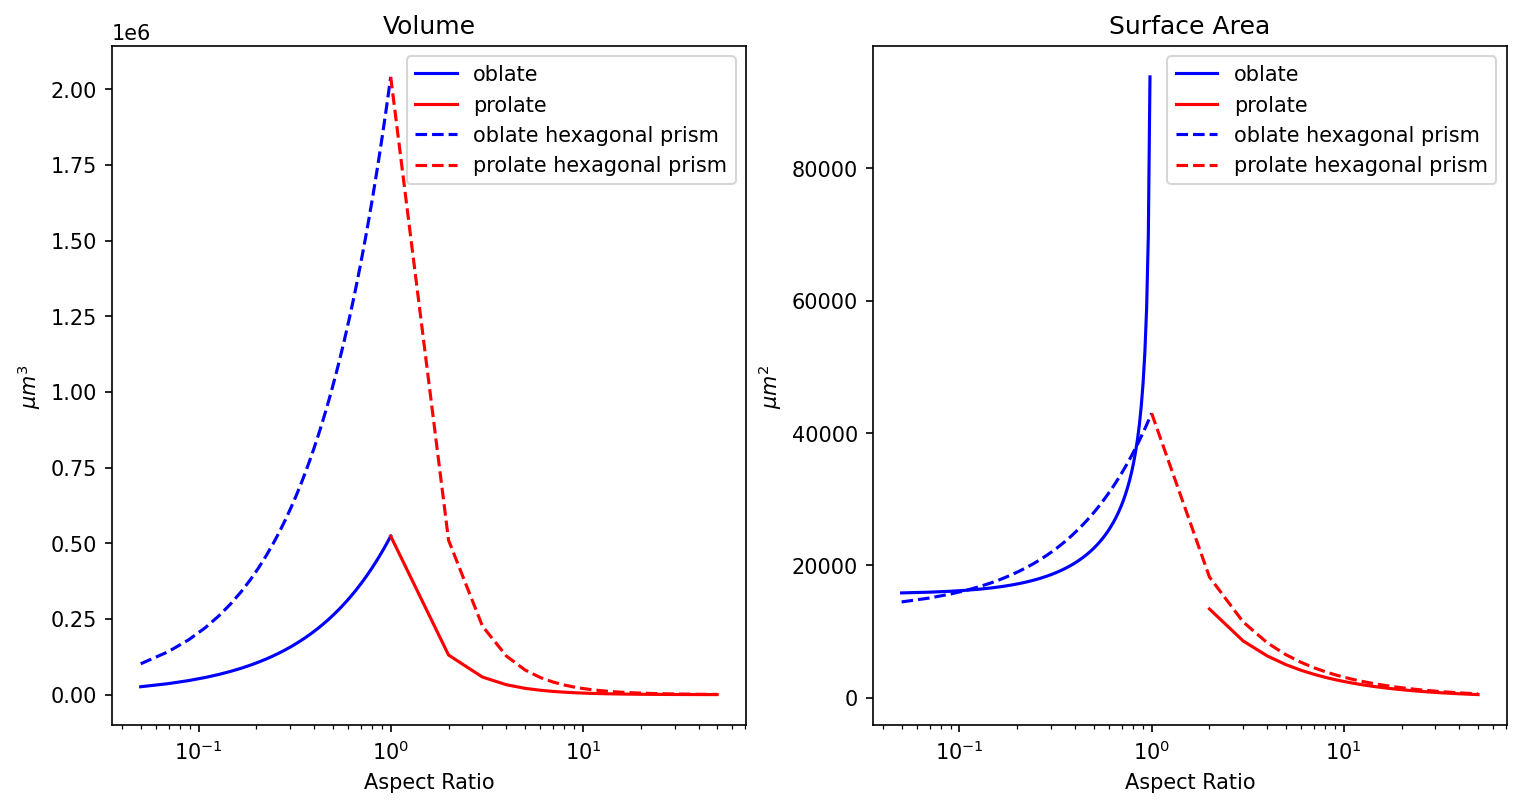

In [97]:
#As above for aspect ratio but varying the smallest axis :
# for oblates, cnst c = a*phi
#for prolates, snst a = c/phi

fig, ax = plt.subplots(ncols=2, figsize=(12,6), dpi=150)

cnst_radius = 5e-5*1e6
oblate_a  = np.linspace(cnst_radius, cnst_radius, npoints)
prolate_c = np.linspace(cnst_radius, cnst_radius, npoints)

#convert the oblate a to a phi, leave oblate c as it is 
#convert the prolate c to a phi, leave prolate a as it is 
phi_prolate = np.linspace(1, 50, npoints)
phi_oblate  = np.linspace(0.05, 1, npoints)

#Volume (a,c)
ax[0].plot(phi_oblate, spheroid_volume(oblate_a, oblate_a*phi_oblate), label='oblate', c='b')
ax[0].plot(phi_prolate, spheroid_volume(prolate_c/phi_prolate, prolate_c), label='prolate',c='r')

ax[0].plot(phi_oblate, hexagonal_prism_volume(oblate_a, oblate_a*phi_oblate), label='oblate hexagonal prism',c='b', ls='--')
ax[0].plot(phi_prolate, hexagonal_prism_volume(prolate_c/phi_prolate, prolate_c), label='prolate hexagonal prism',c='r', ls='--')

#Surface Area
ax[1].plot(phi_oblate, oblate_SA(oblate_a, oblate_a*phi_oblate), label='oblate',c='b')
ax[1].plot(phi_prolate, prolate_SA(prolate_c/phi_prolate, prolate_c), label='prolate',c='r')

ax[1].plot(phi_oblate, hexagonal_prism_SA(oblate_a, oblate_a*phi_oblate), label='oblate hexagonal prism',c='b', ls='--')
ax[1].plot(phi_prolate, hexagonal_prism_SA(prolate_c/phi_prolate, prolate_c), label='prolate hexagonal prism',c='r', ls='--')

ax[0].set_xscale('log'), ax[1].set_xscale('log')
ax[0].legend(), ax[1].legend()
ax[0].set_xlabel("Aspect Ratio"), ax[1].set_xlabel("Aspect Ratio")
ax[0].set_title("Volume"), ax[1].set_title("Surface Area")
ax[0].set_ylabel("$\mu m^3$"), ax[1].set_ylabel("$\mu m^2$")